**Introduction**

We aim to dive deep into these datasets, studying their content, verifying data types, and identifying the top 10 neighborhoods with the highest drop-offs. Our quest doesn't end here though, as we also aspire to visually represent our data, creating compelling graphs depicting the number of rides per taxi company and drop-off numbers for the top neighborhoods.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from functools import reduce
from scipy import stats
from scipy.stats import pearsonr

In [3]:
sql_0 = pd.read_csv('datasets/moved_project_sql_result_01.csv')
sql_1 = pd.read_csv('datasets/moved_project_sql_result_04.csv')
sql_2 = pd.read_csv('datasets/moved_project_sql_result_07.csv')

# Step 4

Studying Data Sets

In [3]:
display(sql_0)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [4]:
#changing values in the average_trips column from floats to ints
sql_1['average_trips'] = sql_1['average_trips'].astype(int)

In [5]:
#Checking for missing Values 
missing_0 = sql_0['trips_amount'].isna().sum()
missing_1 = sql_1['average_trips'].isna().sum()
print(missing_0,missing_1)

0 0


In [6]:
#Checking for duplicates
duplicates_0 = sql_0.duplicated().sum()
duplicates_1 = sql_1.duplicated().sum()
print(duplicates_0,duplicates_1)

0 0


<div class="alert alert-danger"; style="border-left: 7px solid red">
<b>⛔️ Reviewer's comment, v. 1</b> 

Please note that in preprocessing we also should check for full duplicates in the datasets. Also please check the number of missing values **in every column** of every dataset

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 2</b> 
    
Perfect!

Taxi Companies and Number of Rides

In [56]:
sql_0_sorted = sql_0.sort_values(by='trips_amount',ascending=False)

In [58]:
top_10_comps = sql_0_sorted.head(10)
top_10_comps

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


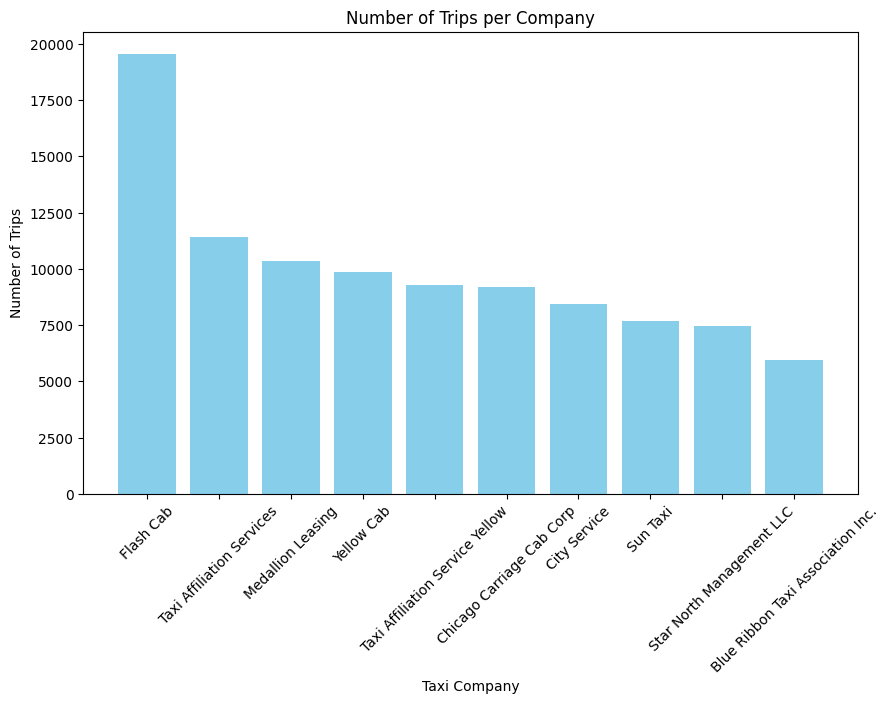

In [59]:
#Building a graph of taxi companies and number of rides
plt.figure(figsize=(10,6))
plt.bar(top_10_comps['company_name'],top_10_comps['trips_amount'],color='skyblue')
plt.xlabel('Taxi Company')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Company')
plt.xticks(rotation=45)
plt.show()

***Conclusions***

**Flash Cab Dominance**: Flash Cab has the highest number of trips, nearly reaching 20,000. This indicates that Flash Cab is the most popular or most utilized taxi company among those listed.

**Top Competitors**: Taxi Affiliation Services and Medallion Leasing follow Flash Cab with approximately 17,500 and 16,000 trips, respectively. These companies are also significant players in the market, though they don’t reach the same level as Flash Cab.

**Market Distribution**: There is a noticeable drop in the number of trips from the top three companies to the others. For example, Yellow Cab and City Service have fewer trips, and Blue Ribbon Taxi Association Inc. has the least, with about 2,500 trips.

**Market Concentration**: The market appears to be concentrated among a few top companies, with Flash Cab, Taxi Affiliation Services, and Medallion Leasing capturing a large share of the total trips. The remaining companies share a smaller portion of the market.

**Implications for Smaller Companies**: Companies like Blue Ribbon Taxi Association Inc. and Chicago Carriage Cab Corp. have significantly fewer trips, suggesting they might face challenges in competing with the larger, more dominant companies.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
Yep, very nice!
</div>

Identifying the Top 10 neighborhoods in terms of drop-offs

In [9]:
sql_1_sorted = sql_1.sort_values(by='average_trips',ascending=False)

In [10]:
top_10_hoods = sql_1_sorted.head(10)
top_10_hoods

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


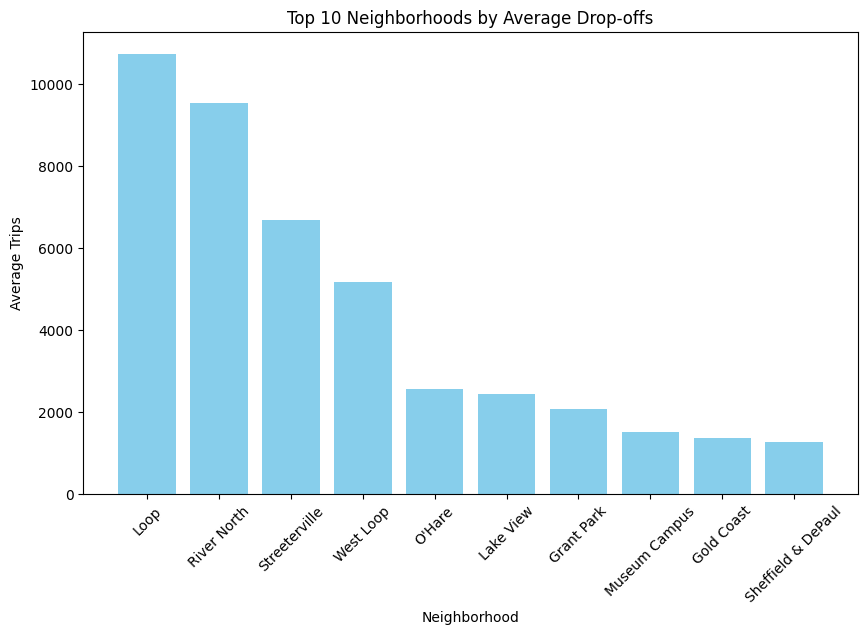

In [12]:
#Building a graph of the top 10 neighborhoods
plt.figure(figsize=(10,6))
plt.bar(top_10_hoods['dropoff_location_name'],top_10_hoods['average_trips'],color='skyblue')
plt.xlabel('Neighborhood')
plt.ylabel('Average Trips')
plt.title('Top 10 Neighborhoods by Average Drop-offs')
plt.xticks(rotation=45)
plt.show()

**Highest Drop-offs**: The “Loop” neighborhood has the highest average drop-offs, indicating it is a major hub, likely due to its commercial, business, or tourist attractions.

**Significant Decrease**: There is a noticeable drop from “Loop” to “Near North,” suggesting that while “Near North” is also popular, it doesn’t attract as much traffic as “Loop.”

**Gradual Decline**: The average drop-offs gradually decrease from “Near North” to “Sheffield & DePaul,” showing a more even distribution of drop-offs among these neighborhoods.

**Lowest Drop-offs**: “Sheffield & DePaul” has the lowest average drop-offs among the top ten, indicating it might be more residential or less commercially active compared to the others.

These results suggest that certain neighborhoods, especially “Loop,” are key areas for activities that generate high traffic, such as business, tourism, or entertainment. This information can be useful for city planners, businesses, and transportation services to understand and cater to the demand in these areas.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
Great! We counted the data from files by dropoff_location_name and company_name, sorted the graphs, applied a single color and indicated small conclusions</div>

<div class="alert alert-warning"; style="border-left: 7px solid gold">
<b>⚠️ Reviewer's comment, v. 1</b> 
    
Also here you can swap the x and y axes in places so that the names are more readable

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
Also I could recommend you this site, may be you could find smth interesting for visualization skills:

https://www.python-graph-gallery.com/

# Step 5

Studying Data

In [61]:
display(sql_2)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [62]:
sql_2['duration_seconds'] = sql_2['duration_seconds'].astype(int)

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
It was done correctly</div>

Testing the hypothesis

"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

**Step 1**: Formulate Hypotheses
Null Hypothesis (H₀): The average duration of rides from the Loop to O’Hare International Airport does not change on rainy Saturdays.

Alternative Hypothesis (H₁): The average duration of rides from the Loop to O’Hare International Airport changes on rainy Saturdays.

**Step 2**: Set the Significance Level
We’ll set the significance level (alpha) at 0.05, which is a common choice in hypothesis testing.

**Step 3**: Collect and Prepare Data
We’ll filter the dataframe to include only rides on Saturdays and then separate the data into two groups: rainy and non-rainy.

**Step 4**: Perform the Statistical Test
We’ll use an independent two-sample t-test to compare the means of the two groups. This test is appropriate because we are comparing the means of two independent groups.

**Step 5**: Interpret the Results
We’ll determine whether to reject the null hypothesis based on the p-value from the t-test.
Here’s how you can accomplish this in Python:

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
Hypotheses were formulated</div>

In [64]:
# Convert start_ts to datetime
sql_2['start_ts'] = pd.to_datetime(sql_2['start_ts'])

# Filter data for Saturdays
sql_2['day_of_week'] = sql_2['start_ts'].dt.day_name()
saturdays_df = sql_2[sql_2['day_of_week'] == 'Saturday']

# Separate data into rainy and non-rainy
rainy_saturdays = saturdays_df[saturdays_df['weather_conditions'] == 'Bad']['duration_seconds']
non_rainy_saturdays = saturdays_df[saturdays_df['weather_conditions'] == 'Good']['duration_seconds']

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(rainy_saturdays, non_rainy_saturdays, nan_policy='omit')

# Print results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in ride durations on rainy Saturdays.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in ride durations on rainy Saturdays.")

T-statistic: 6.946177714041499
P-value: 6.517970327099473e-12
Reject the null hypothesis: There is a significant difference in ride durations on rainy Saturdays.


**Explanation**


* ***Null and Alternative Hypotheses**: We assume no difference in average ride durations (null hypothesis) and test against the possibility of a difference (alternative hypothesis).

* **Significance Level**: We chose 0.05 to balance the risk of Type I and Type II errors.

* **Statistical Test**: The independent two-sample t-test is used because it compares the means of two independent groups.

* **Interpretation**: Based on the p-value, we decide whether to reject the null hypothesis.

**Overall Conclusion**

In conclusion, our research indicates that the taxi industry leans heavily towards market domination by a few key companies, including Flash Cab, Taxi Affiliation Services and Medallion Leasing. These leaders notably outperform smaller entities like Blue Ribbon Taxi Association Inc., which struggle with competitiveness in the face of heightened market concentration. 

The location data collected points towards the "Loop" neighborhood as the primary destination for drop-offs, implying its high commercial or tourist activity. In contrast, areas like "Sheffield & DePaul" demonstrate lower destination demand, hinting at a more residential nature or less commercial activity. 

The statistical analysis, drawn from two-sample t-tests, helped us understand and interpret the taxi operation patterns. The significance level of 0.05 was instrumental in balancing the risk of Type I and II errors. 
This study offers valuable insights for a variety of audiences, from city planners to transportation services, for accommodating the demand dynamics across different areas, and provides strategic inputs for smaller taxi companies to enhance their market presence.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b>

The entire output is formed brilliantly

<div class="alert alert-danger"; style="border-left: 7px solid red">
<b>⛔️ Reviewer's comment, v. 1</b>

But also, please note that in each research, in addition to intermediate conclusions, there should be a general conclusion on all the work carried out. It is not necessary to reflect all the stages in this conclusion in great detail, it is enough to add the main points.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 2</b> 
    
That's great! The general conclusion in the project has also been added

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>Review summary</b> 
    
Justin, the project is great! You have very strong analytical skills, knowledge of research tools and understanding of statistical methods. But still there are a few comments in the project and I will ask you to correct them so that your project becomes even better!